This Jupyter Notebook focuses on Exploratory Data Analysis (EDA) of the 'automobile' dataset. It encompasses generating visualizations, exploring different aspects of the dataset, and documenting findings. This project aims to uncover and explain insights into the characteristics, trends, and patterns present in the 'automobile' dataset in detail. A comprehensive report on the findings in this Jupyter Notebook can be found in the 'CP2_2_Automobile EDA Task Doc.pdf' document. You can access the report on my GitHub portfolio in the same folder where this notebook is located.

In [310]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import fuzzywuzzy
from fuzzywuzzy import process

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [328]:
#### Load the automobile dataset 
automobile_df = pd.read_csv('automobile.txt')

# display first 5 rows of the dateframe
automobile_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Explore the dataset

In [329]:
# get data info
print(f"Data info:\n\n{automobile_df.info}")

# get column data types
print(f"\nColumn data typesa:\n\n {automobile_df.dtypes}")

Data info:

<bound method DataFrame.info of      symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible       

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['normalized-losses','num-of-doors', 'engine-location', 'fuel-system', 'aspiration', 'compression-ratio', 'symboling']` from the data set as they will not be used in the analysis.

In [330]:
# Code here
automobile_df.drop(['normalized-losses','num-of-doors', 'engine-location', 'fuel-system', 'aspiration', 'compression-ratio', 'symboling'], axis=1, inplace=True)


##### Remove any duplicate rows

In [331]:
# Code here
automobile_df.drop_duplicates()

,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,111,5000,21,27,13495
1,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,111,5000,21,27,16500
2,alfa-romero,gas,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,154,5000,19,26,16500
3,audi,gas,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.40,102,5500,24,30,13950
4,audi,gas,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.40,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,109.1,188.8,68.9,55.5,2952,ohc,four,141,3.78,3.15,114,5400,23,28,16845
201,volvo,gas,sedan,rwd,109.1,188.8,68.8,55.5,3049,ohc,four,141,3.78,3.15,160,5300,19,25,19045
202,volvo,gas,sedan,rwd,109.1,188.8,68.9,55.5,3012,ohcv,six,173,3.58,2.87,134,5500,18,23,21485
203,volvo,diesel,sedan,rwd,109.1,188.8,68.9,55.5,3217,ohc,six,145,3.01,3.40,106,4800,26,27,22470


There were no duplicate rows to be removed.

#### Change the observed question marks to NaN values for easier manipulation of the dataframe.

In [332]:
# code here
automobile_df.replace('?',np.nan, inplace = True)
automobile_df.columns

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

#### Change data types
It appears that certain cloumn data is stored as objects/strings, which could be better represented as integers or floats for smoother analysis. This is notable in the following columns: `['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']`. Change the format of these data to int. This will allow for eaiser data preprocessing and manipulation.

In [333]:
# code here

# changing data types for the above mentioned columns
automobile_df['bore'] = automobile_df['bore'].str.strip().astype(float)
automobile_df['stroke'] = automobile_df['stroke'].str.strip().astype(float)
automobile_df['horsepower'] = automobile_df['horsepower'].str.strip().astype(float)
automobile_df['peak-rpm'] = automobile_df['peak-rpm'].str.strip().astype(float)
automobile_df['price'] = automobile_df['price'].str.strip().astype(float)

#### Check for rows with missing data 

Get the sum of missing data in each column and then address it appropriately

In [334]:
# Code here

# get the number of missing data points per column
missing_values = automobile_df.isnull().sum()

# look at the # of missing points in each column
print(f"\nMissing values per column:\n\n{missing_values.count}")


Missing values per column:

<bound method Series.count of make                0
fuel-type           0
body-style          0
drive-wheels        0
wheel-base          0
length              0
width               0
height              0
curb-weight         0
engine-type         0
num-of-cylinders    0
engine-size         0
bore                4
stroke              4
horsepower          2
peak-rpm            2
city-mpg            0
highway-mpg         0
price               4
dtype: int64>


There is missing data in the 'bore', 'stroke', 'horsepower', 'peak-rpm' and 'price' columns.

Display the rows of missing data.

In [335]:
# code here
nan_rows = automobile_df[automobile_df.isna().any(axis=1)]

nan_rows

,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,audi,gas,hatchback,4wd,99.5,178.2,67.9,52.0,3053,ohc,five,131,3.13,3.40,160.0,5500.0,16,22,NaN
44,isuzu,gas,sedan,fwd,94.5,155.9,63.6,52.0,1874,ohc,four,90,3.03,3.11,70.0,5400.0,38,43,NaN
45,isuzu,gas,sedan,fwd,94.5,155.9,63.6,52.0,1909,ohc,four,90,3.03,3.11,70.0,5400.0,38,43,NaN
55,mazda,gas,hatchback,rwd,95.3,169.0,65.7,49.6,2380,rotor,two,70,NaN,NaN,101.0,6000.0,17,23,10945.0
56,mazda,gas,hatchback,rwd,95.3,169.0,65.7,49.6,2380,rotor,two,70,NaN,NaN,101.0,6000.0,17,23,11845.0
57,mazda,gas,hatchback,rwd,95.3,169.0,65.7,49.6,2385,rotor,two,70,NaN,NaN,101.0,6000.0,17,23,13645.0
58,mazda,gas,hatchback,rwd,95.3,169.0,65.7,49.6,2500,rotor,two,80,NaN,NaN,135.0,6000.0,16,23,15645.0
129,porsche,gas,hatchback,rwd,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,3.94,3.11,288.0,5750.0,17,28,NaN
130,renault,gas,wagon,fwd,96.1,181.5,66.5,55.2,2579,ohc,four,132,3.46,3.90,NaN,NaN,23,31,9295.0
131,renault,gas,hatchback,fwd,96.1,176.8,66.6,50.5,2460,ohc,four,132,3.46,3.90,NaN,NaN,23,31,9895.0


### Addressing the missing data

The missing data in the 'bore', 'stroke', 'horsepower', 'peak-rpm', and 'price' columns can be classified as MCAR (Missing Completely At Random). This means that the probability of data being missing is consistent across all observations and is unrelated to any observed or unobserved data within the dataset (HyperionDev, 2021). Although there is a small portion of missing data in these columns, it can be addressed by replacing it with the mean, median, or mode of the data from vehicles with similar attributes such as make, body style, and fuel type

### Fill in the missing 'bore' and 'stroke' column values. 

Filling the missing data with the respective means of vehicles of with similar horsepower and peak-rpm will is suitable. This is based on the fact that 
ann engine's boreand stroke are related it's rpms and power (Road & Track, 2024)).

In [339]:
# code here

# rename peak-rpm column to peak_rpm to be able to call the cloumn
automobile_df.rename(columns = {'peak-rpm':'peak_rpm'}, inplace = True)

# all data entries for vehicle with the same rpm as the car with missing bore and stroke data
similar_rpm = automobile_df[automobile_df.peak_rpm == '6000']

similar_rpm


,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,horsepower,peak_rpm,city-mpg,highway-mpg,price


In [340]:
# all data entries for vehicle with the same horsepoer as the car with missing bore and stroke data
similar_hp = automobile_df[automobile_df.horsepower == '101']

similar_hp

,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,horsepower,peak_rpm,city-mpg,highway-mpg,price


It can be seen from the 'similar_hp' dataset that the three first vehicles are most similar to our vehicles with missing bore and stroke values. The missing data will be replaed with the means of these respective colum values.

In [341]:
# code here

# get mean of bore for the three similar vehicles - change data format to perform operation
bore_mean = similar_hp['bore'][0:3].astype(np.float16).mean
stroke_mean = similar_hp['stroke'][0:3].astype(np.float16).mean

# replace missing data with respectve means - as floats
automobile_df['bore'].fillna(bore_mean, inplace = True)
automobile_df['stroke'].fillna(stroke_mean, inplace = True)

### Fill in the missing 'horsepower' and 'peak-rpm' column values. 

Since bore and stroke are related to horspower and rpm (peak-rpm), the averages of vehicles witt similar bore and stroke values can be used to fill the missing horsepower and peak-rpm data.

In [342]:
# code here

# all data entries for vehicle with the same bore as the car with missing horsepower
similar_bore = automobile_df[automobile_df.bore == '3.46']
similar_bore

,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,horsepower,peak_rpm,city-mpg,highway-mpg,price


In [343]:
# all data entries for vehicle with the same rpm as the car with missing horsepower and rpm
similar_rpm2 = automobile_df[automobile_df.stroke == '3.90']
similar_rpm2

,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,horsepower,peak_rpm,city-mpg,highway-mpg,price


It can be seen from the 'similar_rpm2' dataset that the first vehicle is the most similar to our vehicle with missing horsepower and rpm. The missing data will be replaed with this veciles horsepower and rpm values.

In [344]:
# code here
automobile_df['horsepower'].fillna(145, inplace = True)
automobile_df['peak_rpm'].fillna(5000, inplace = True)

### Fill in the missing 'price' column values.

Fill in the missing price values with the average price of vehicles of the same make.

In [345]:
#code here

# get price means of vehicles makes with missing price values
avg_audi = automobile_df[automobile_df.make == 'audi'].loc[:,'price'].astype(np.float32).mean(skipna=True)
avg_porsche = automobile_df[automobile_df.make == 'porsche'].loc[:,'price'].astype(np.float32).mean(skipna=True)
avg_isuzu = automobile_df[automobile_df.make == 'isuzu'].loc[:,'price'].astype(np.float32).mean(skipna=True)

# replaces missing price data with respective vehicle averages using indeces form missing data dataframe
automobile_df.loc[9,'price'] = avg_audi
automobile_df.loc[44,'price'] = avg_isuzu
automobile_df.loc[45,'price'] = avg_isuzu
automobile_df.loc[129,'price'] = avg_porsche

Confirm that all missing datat has ben replaced.

In [346]:
# code here
missing_values = automobile_df.isna().sum()
print(f"\nMissing values per column:\n\n{missing_values.count}")


Missing values per column:

<bound method Series.count of make                0
fuel-type           0
body-style          0
drive-wheels        0
wheel-base          0
length              0
width               0
height              0
curb-weight         0
engine-type         0
num-of-cylinders    0
engine-size         0
bore                0
stroke              0
horsepower          0
peak_rpm            0
city-mpg            0
highway-mpg         0
price               0
dtype: int64>


### Finding Certain vehicle Makes

Locate all vehicles of the 'Alpha-Romeo' make. 

In [347]:
# Create a dataframe with all the vehicles of the 'Alfa Romeo' make

benz = automobile_df[automobile_df['make'] == 'mercedes-benz']

benz

,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,horsepower,peak_rpm,city-mpg,highway-mpg,price
67,mercedes-benz,diesel,sedan,rwd,110.0,190.9,70.3,56.5,3515,ohc,five,183,3.58,3.64,123.0,4350.0,22,25,25552.0
68,mercedes-benz,diesel,wagon,rwd,110.0,190.9,70.3,58.7,3750,ohc,five,183,3.58,3.64,123.0,4350.0,22,25,28248.0
69,mercedes-benz,diesel,hardtop,rwd,106.7,187.5,70.3,54.9,3495,ohc,five,183,3.58,3.64,123.0,4350.0,22,25,28176.0
70,mercedes-benz,diesel,sedan,rwd,115.6,202.6,71.7,56.3,3770,ohc,five,183,3.58,3.64,123.0,4350.0,22,25,31600.0
71,mercedes-benz,gas,sedan,rwd,115.6,202.6,71.7,56.5,3740,ohcv,eight,234,3.46,3.1,155.0,4750.0,16,18,34184.0
72,mercedes-benz,gas,convertible,rwd,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,3.46,3.1,155.0,4750.0,16,18,35056.0
73,mercedes-benz,gas,sedan,rwd,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,3.8,3.35,184.0,4500.0,14,16,40960.0
74,mercedes-benz,gas,hardtop,rwd,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,3.8,3.35,184.0,4500.0,14,16,45400.0


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

### Top 5 most expensive vehicles 

How do the most expensive and cheapest vehicles compare? Exploring the most expensive vehicles highlights if some vehicles are worth the money spent on them.

<ipython-input-350-7d7b84dc266e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=expensive_cheapest, y='make', x='price', palette = 'muted')


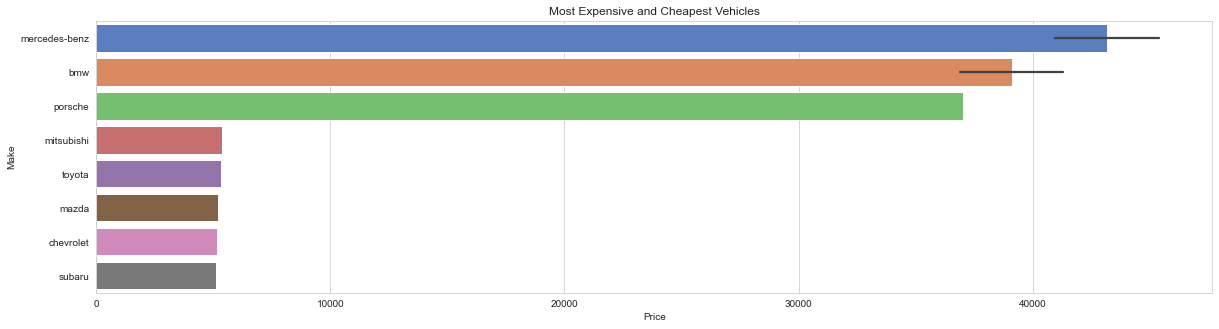

In [350]:
# Code here

# get most expensive vehicled by sorting according to price (descending order)
most_expensive = automobile_df.sort_values(by='price', axis=0, ascending=False)

# get cheapest vehicles by sorting according to price (ascending order)
cheapest = automobile_df.sort_values(by='price', axis=0, ascending=True)

# create a new dataframe with the top five most expensive and top five cheapest vehicles.
frames = [most_expensive.iloc[0:5,:], cheapest.iloc[0:5,:]]

# concatenate the dataframes
expensive_cheapest= pd.concat(frames)

# sort the movies in decending order by budgets
expensive_cheapest.sort_values(by='price', axis=0, ascending=False, inplace=True)

# bar plot
plt.figure(figsize=(20,5))
sns.barplot(data=expensive_cheapest, y='make', x='price', palette = 'muted')
plt.xlabel('Price')
plt.ylabel('Make')
plt.title("Most Expensive and Cheapest Vehicles")
plt.show()

### Vehicles with the top 5 horsepower ratings

Compare the min and max horsepower. The comparison helps us identify the different performance level of each vehicle.

<ipython-input-354-4e048d05610e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hps, y='make', x='horsepower', palette = 'husl')


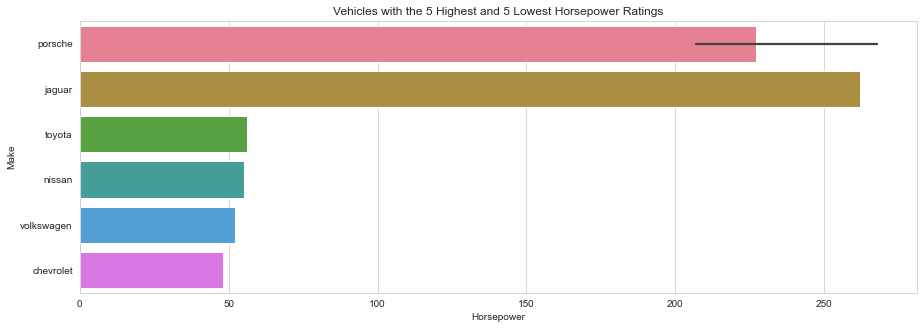

In [354]:

# create 5 highest and 5 lowest horsepower dataframes
highest_hp = automobile_df.sort_values(by='horsepower', axis=0, ascending=False)
lowest_hp = automobile_df.sort_values(by='horsepower', axis=0, ascending=True)

# create a new dataframe with the top five highest and lowest horsepwer ratings.
frames = [highest_hp.iloc[0:5,:], lowest_hp.iloc[0:5,:]]

# concatenate the dataframes
hps= pd.concat(frames)

# sort the vehicles in decending order by horsepower
hps.sort_values(by='horsepower', axis=0, ascending=False, inplace=True)

# bar plot
plt.figure(figsize=(15,5))
sns.barplot(data=hps, y='make', x='horsepower', palette = 'husl')
plt.xlabel('Horsepower')
plt.title("Vehicles with the 5 Highest and 5 Lowest Horsepower Ratings")
plt.ylabel('Make')
plt.show()

#### MPG in the city of the vehicle by make

<ipython-input-372-6c7de7bfa115>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= vehicle_mpgc , y='city-mpg', x='make', palette = 'ch:s=-.2,r=.6')


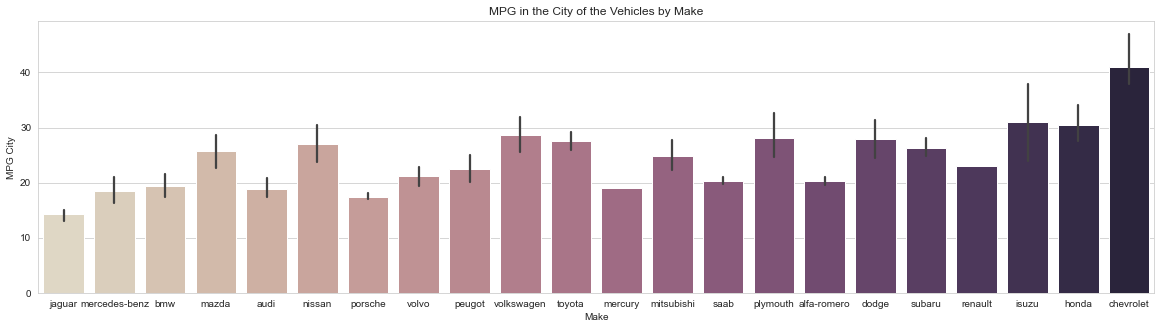

In [372]:
# Code here

# sort dataframe by city-mpg - new temp data frame
vehicle_mpgc = automobile_df.sort_values(by='city-mpg', ascending=True)

# bar plot
plt.figure(figsize=(20,5))
sns.barplot(data= vehicle_mpgc , y='city-mpg', x='make', palette = 'ch:s=-.2,r=.6')
plt.xlabel('Make')
plt.title("MPG in the City of the Vehicles by Make")
plt.ylabel('MPG City')
plt.show()

### MPG on the highway of the vehicles by make

<ipython-input-374-570e960d1766>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= vehicle_mpgh, y='highway-mpg', x='make', palette = 'YlOrBr')


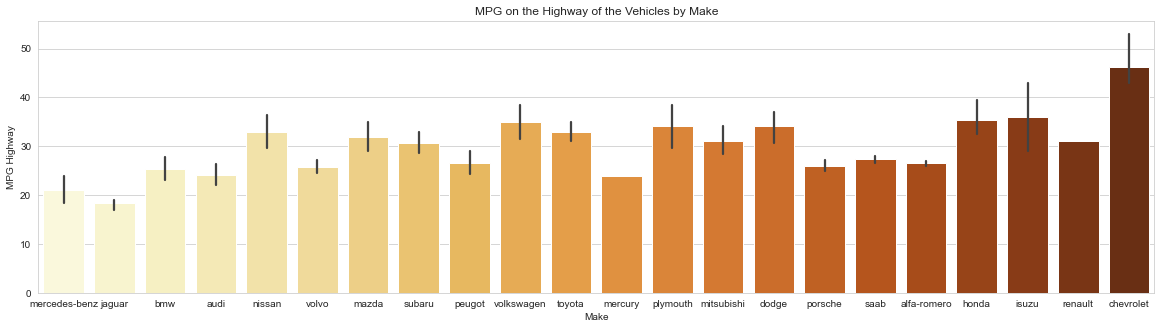

In [374]:
# Code here

# sort dataframe by highway-mpg - new temp data frame
vehicle_mpgh = automobile_df.sort_values(by='highway-mpg', ascending=True)

# bar plot
plt.figure(figsize=(20,5))
sns.barplot(data= vehicle_mpgh, y='highway-mpg', x='make', palette = 'YlOrBr')
plt.xlabel('Make')
plt.title("MPG on the Highway of the Vehicles by Make")
plt.ylabel('MPG Highway')
plt.show()

#### Most common vehicle make
Create a bar plot of vehicle frequency by make

<ipython-input-296-83f5d3443978>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = automobile_df, x = 'make', order = automobile_df['make'].value_counts().index, palette = 'ch:s=.25,rot=-.25')


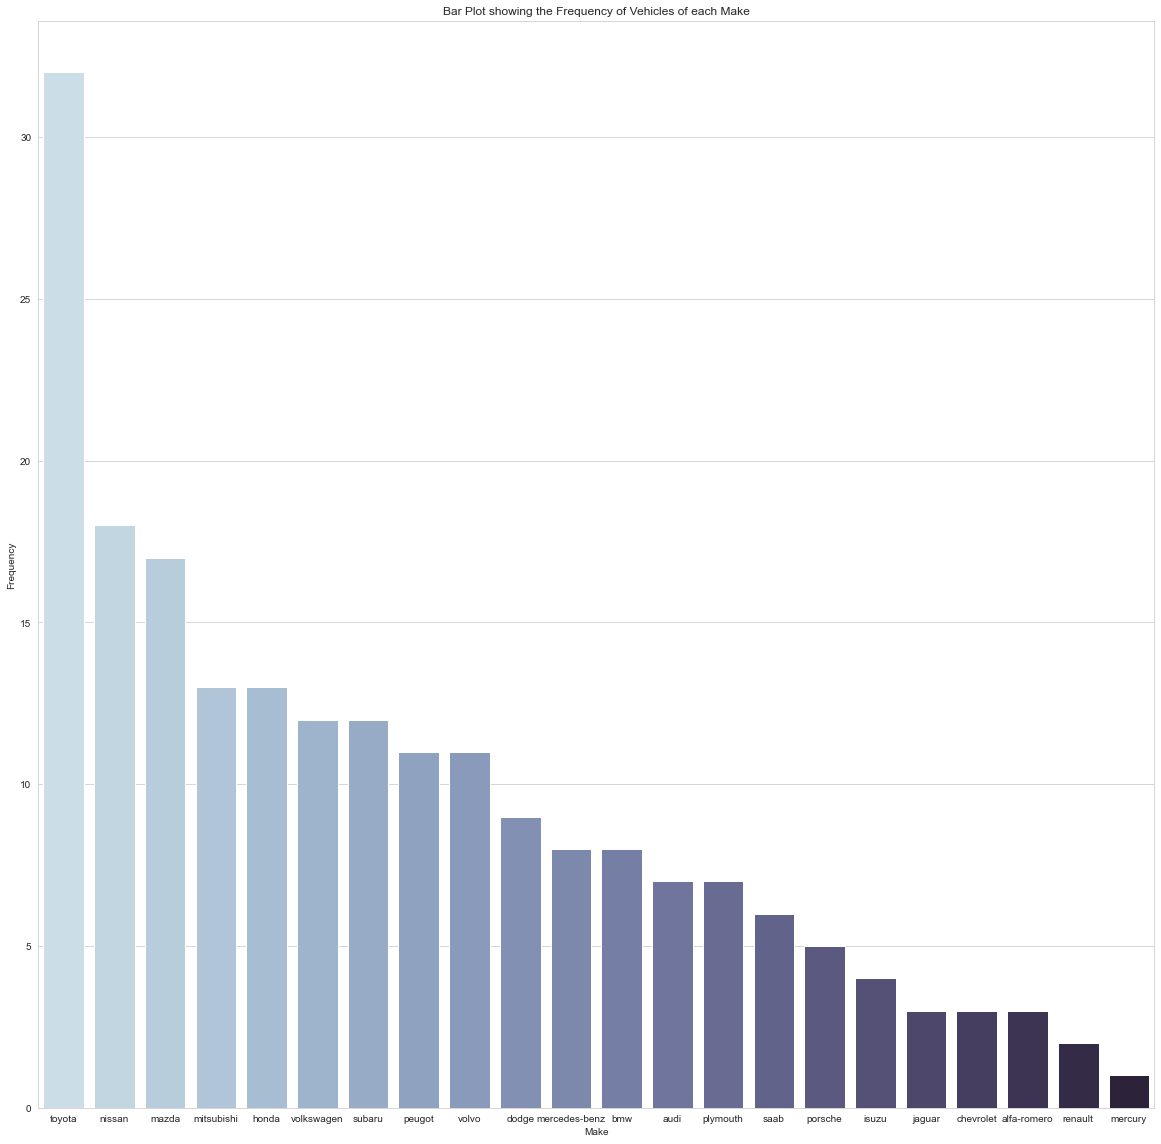

In [296]:
 # Code here
    
# bar plot of vehicle frequency by make
fig = plt.figure(figsize = (20,20))
sns.countplot(data = automobile_df, x = 'make', order = automobile_df['make'].value_counts().index, palette = 'ch:s=.25,rot=-.25')
plt.title('Bar Plot showing the Frequency of Vehicles of each Make')
plt.xlabel('Make')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Generate three different interesting visualisations with a data story.

#### 1. What is the relationship between engine size and horsepower?

Create a scatter plot showing the relationship between engine size and horsepower.

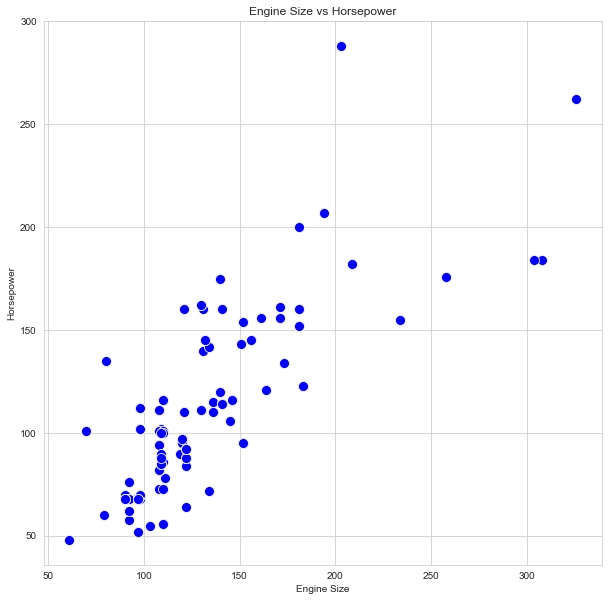

In [375]:
fig = plt.figure(figsize = (10,10))
sns.scatterplot(data= automobile_df, x="engine-size", y="horsepower", color = 'blue', s = 100)
plt.title('Engine Size vs Horsepower')
plt.ylabel('Horsepower')
plt.xlabel('Engine Size')
plt.show()

In the figure titled "Engine vs. Horsepower," a clear positive correlation is evident between engine size and horsepower. This relationship indicates that, typically, as the engine size of a vehicle increases, so does its horsepower rating.

#### 2. What portion/percentage of the cars belong to each body style category ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']?

Create a pie chart showing the percentage of cars in each by body style.

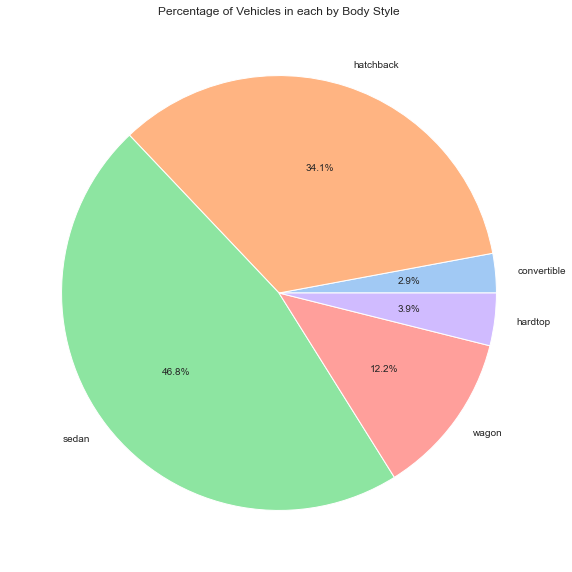

In [376]:
# change body-style to body_style for use in code
automobile_df.rename(columns = {'body-style':'body_style'}, inplace = True)

# get frequency of cars of each body style
conv = automobile_df[automobile_df.body_style == 'convertible'].count()

hatch = automobile_df[automobile_df.body_style == 'hatchback'].count()

sedan = automobile_df[automobile_df.body_style == 'sedan'].count()

wagon = automobile_df[automobile_df.body_style == 'wagon'].count()

hardtop = automobile_df[automobile_df.body_style == 'hardtop'].count()

# get percentage of each body style of all cars in data

c = conv[0]/205 * 100

h = hatch[0]/205 * 100

s = sedan[0]/205 * 100

w = wagon[0]/205 * 100

ht = hardtop[0]/205 * 100

# create pie chart portions and label dictionary and dataframe
data = {'labels': ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
       'portions': [c,h,s,w,ht]}

pie_df = pd.DataFrame(data)

# plot pie chart
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
plt.pie(pie_df['portions'], labels= pie_df['labels'], autopct='%1.1f%%', colors = sns.color_palette('pastel')[0:5])
plt.title('Percentage of Vehicles in each by Body Style')
plt.show()

#### 3. How do fwd, rwd and 4wd vehicles compare in price?

Box and whisker plot comparing the prices of fwd, rwd and 4wd vehicles.

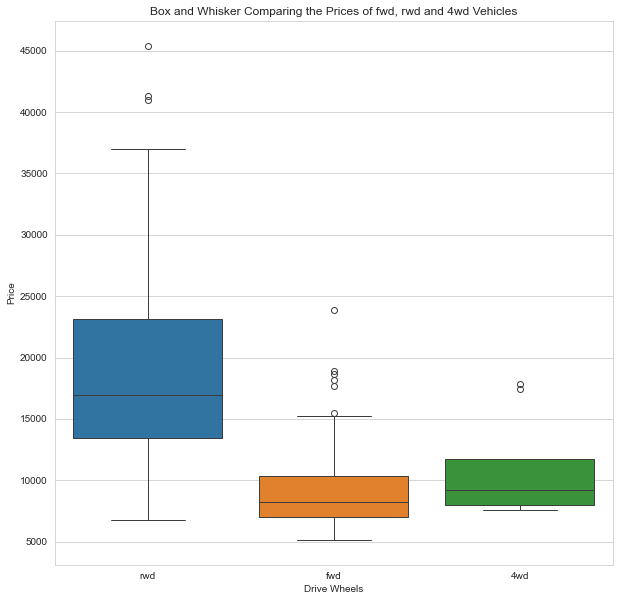

In [378]:
fig = plt.figure(figsize = (10,10))
sns.boxplot(x="drive-wheels", y="price", data=automobile_df, hue = 'drive-wheels')
plt.xlabel("Drive Wheels")
plt.ylabel("Price")
plt.title("Box and Whisker Comparing the Prices of fwd, rwd and 4wd Vehicles")
plt.show()
